In [1]:
import pandas as pd
import statsmodels
import numpy as np
import matplotlib.pyplot as plt


pit_stops = pd.read_csv('pit_stops.csv', encoding="utf-8")
results = pd.read_csv('results.csv', encoding="utf-8")

pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [2]:
results.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,1:29.534,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3


In [3]:
# rename milliseconds to stop time and race_time to avoid confusion
pit_stops.rename(columns = {'milliseconds': 'pit_time'}, inplace = True)
results.rename(columns = {'milliseconds': 'race_time'}, inplace = True)
pit_merge = pd.merge(pit_stops, results, on=['raceId', 'driverId'])
pit_merged = pit_merge[pit_merge['statusId'] == 1] # filters out only finished races
pit_merged.head(20)


,raceId,driverId,stop,lap,time_x,duration,pit_time,resultId,constructorId,number,...,positionOrder,points,laps,time_y,race_time,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
5,841,17,1,11,17:20:48,23.426,23426,20783,9,2,...,5,10.0,58,+38.171,5408430,50,3,1:29.600,213.066,1
6,841,17,2,26,17:44:29,22.520,22520,20783,9,2,...,5,10.0,58,+38.171,5408430,50,3,1:29.600,213.066,1
7,841,17,3,41,18:07:37,26.230,26230,20783,9,2,...,5,10.0,58,+38.171,5408430,50,3,1:29.600,213.066,1
8,841,4,1,12,17:22:34,23.251,23251,20782,6,5,...,4,12.0,58,+31.772,5402031,49,2,1:29.487,213.336,1
9,841,4,2,27,17:46:04,24.733,24733,20782,6,5,...,4,12.0,58,+31.772,5402031,49,2,1:29.487,213.336,1
10,841,4,3,42,18:09:08,24.181,24181,20782,6,5,...,4,12.0,58,+31.772,5402031,49,2,1:29.487,213.336,1
11,841,13,1,13,17:24:10,23.842,23842,20785,6,6,...,7,6.0,58,+1:25.186,5455445,55,1,1:28.947,214.631,1
12,841,13,2,31,17:52:28,24.500,24500,20785,6,6,...,7,6.0,58,+1:25.186,5455445,55,1,1:28.947,214.631,1
13,841,13,3,48,18:18:54,24.095,24095,20785,6,6,...,7,6.0,58,+1:25.186,5455445,55,1,1:28.947,214.631,1
18,841,20,1,14,17:25:17,22.603,22603,20779,9,1,...,1,25.0,58,1:29:30.259,5370259,44,4,1:29.844,212.488,1


In [5]:
# Print all the column names in merged DataFrame
print(pit_merged.columns)
pit_merged.describe()

Index(['raceId', 'driverId', 'stop', 'lap', 'time_x', 'duration', 'pit_time',
       'resultId', 'constructorId', 'number', 'grid', 'position',
       'positionText', 'positionOrder', 'points', 'laps', 'time_y',
       'race_time', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed',
       'statusId'],
      dtype='object')


,raceId,driverId,stop,lap,pit_time,resultId,constructorId,grid,positionOrder,points,laps,statusId
count,5495.000000,5495.000000,5495.000000,5495.000000,5.495000e+03,5495.000000,5495.000000,5495.000000,5495.000000,5495.000000,5495.000000,5495.0
mean,968.773066,470.766333,1.767971,25.777434,9.585708e+04,23390.279163,57.016197,8.278799,6.686078,8.863512,59.338672,1.0
std,83.117441,401.979336,0.917924,14.527786,3.328227e+05,1609.147279,76.429609,5.662657,4.107880,7.823844,8.977774,0.0
min,841.000000,1.000000,1.000000,1.000000,1.317300e+04,20779.000000,1.000000,0.000000,1.000000,0.000000,28.000000,1.0
25%,891.000000,13.000000,1.000000,14.000000,2.170500e+04,21933.000000,5.000000,3.000000,3.000000,1.000000,53.000000,1.0
50%,963.000000,814.000000,2.000000,25.000000,2.339200e+04,23250.000000,9.000000,7.000000,6.000000,8.000000,57.000000,1.0
75%,1044.000000,830.000000,2.000000,36.000000,2.584450e+04,24889.000000,131.000000,12.000000,10.000000,15.000000,67.000000,1.0
max,1110.000000,858.000000,6.000000,78.000000,3.069017e+06,26083.000000,214.000000,24.000000,19.000000,50.000000,87.000000,1.0


In [ ]:
# retain only the columns we need 
selected_columns = ['raceId', 'driverId', 'stop', 'pit_time', 'race_time']
my_pit = pit_merged[selected_columns]

my_pit = my_pit.copy() # make copy to modify without changing original dataset

my_pit.rename(columns = {'stop': 'number_of_stops' }, inplace = True)
my_pit.head(10)

,raceId,driverId,number_of_stops,pit_time,race_time
5,841,17,1,23426,5408430
6,841,17,2,22520,5408430
7,841,17,3,26230,5408430
8,841,4,1,23251,5402031
9,841,4,2,24733,5402031
10,841,4,3,24181,5402031
11,841,13,1,23842,5455445
12,841,13,2,24500,5455445
13,841,13,3,24095,5455445
18,841,20,1,22603,5370259


In [ ]:
# remove missing values
my_pit.replace('\\N', np.nan, inplace=True)
my_pit.dropna(inplace=True)
my_pit.head()


,raceId,driverId,number_of_stops,pit_time,race_time
5,841,17,1,23426,5408430
6,841,17,2,22520,5408430
7,841,17,3,26230,5408430
8,841,4,1,23251,5402031
9,841,4,2,24733,5402031


In [ ]:
#my_pit['lap_ratio'] = my_pit['stop_lap'] / my_pit['total_laps']
#my_pit.head()

In [ ]:
# Group by race and driver and compute total stops
total_stops = my_pit.groupby(['raceId', 'driverId'])['number_of_stops'].transform('max')

# Update the 'number of stop' column
my_pit['number_of_stops'] = total_stops
my_pit.head()


,raceId,driverId,number_of_stops,pit_time,race_time
5,841,17,3,23426,5408430
6,841,17,3,22520,5408430
7,841,17,3,26230,5408430
8,841,4,3,23251,5402031
9,841,4,3,24733,5402031


In [ ]:
# Sum all pit stop times to find total time spent on pit stops
total_pit_time = my_pit.groupby(['raceId', 'driverId'])['pit_time'].transform('sum')

# Update the 'pit_time' column
my_pit['pit_time'] = total_pit_time

my_pit.head()

,raceId,driverId,number_of_stops,pit_time,race_time
5,841,17,3,72176,5408430
6,841,17,3,72176,5408430
7,841,17,3,72176,5408430
8,841,4,3,72165,5402031
9,841,4,3,72165,5402031


In [ ]:
# Since we have a sum, drop duplicates 
my_pit = my_pit.drop_duplicates(subset=['raceId', 'driverId'])

my_pit.head()


,raceId,driverId,number_of_stops,pit_time,race_time
5,841,17,3,72176,5408430
8,841,4,3,72165,5402031
11,841,13,3,72437,5455445
18,841,20,2,46639,5370259
28,841,1,2,46426,5392556


In [ ]:
print(my_pit['race_time'].dtype)
my_pit['race_time'] = my_pit['race_time'].astype(int)
print(my_pit['race_time'].dtype)

object
int64


In [ ]:
my_pit.head()

,raceId,driverId,number_of_stops,pit_time,race_time
5,841,17,3,72176,5408430
8,841,4,3,72165,5402031
11,841,13,3,72437,5455445
18,841,20,2,46639,5370259
28,841,1,2,46426,5392556


In [ ]:
my_pit.describe()

,raceId,driverId,number_of_stops,pit_time,race_time
count,2645.000000,2645.000000,2645.000000,2.645000e+03,2.645000e+03
mean,975.202647,488.621928,2.077883,1.991435e+05,6.001743e+06
std,81.651452,399.591173,0.975485,5.696359e+05,1.194035e+06
min,841.000000,1.000000,1.000000,1.743400e+04,4.526665e+06
25%,897.000000,13.000000,1.000000,2.935600e+04,5.386666e+06
50%,976.000000,815.000000,2.000000,4.693200e+04,5.728798e+06
75%,1046.000000,830.000000,3.000000,6.630200e+04,6.141857e+06
max,1110.000000,858.000000,6.000000,3.703013e+06,1.474314e+07


In [ ]:
for column in my_pit.columns:
    print(column)
    print(len(my_pit[column].unique()))
    print("\n")

raceId
251


driverId
66


number_of_stops
6


pit_time
2580


race_time
2643




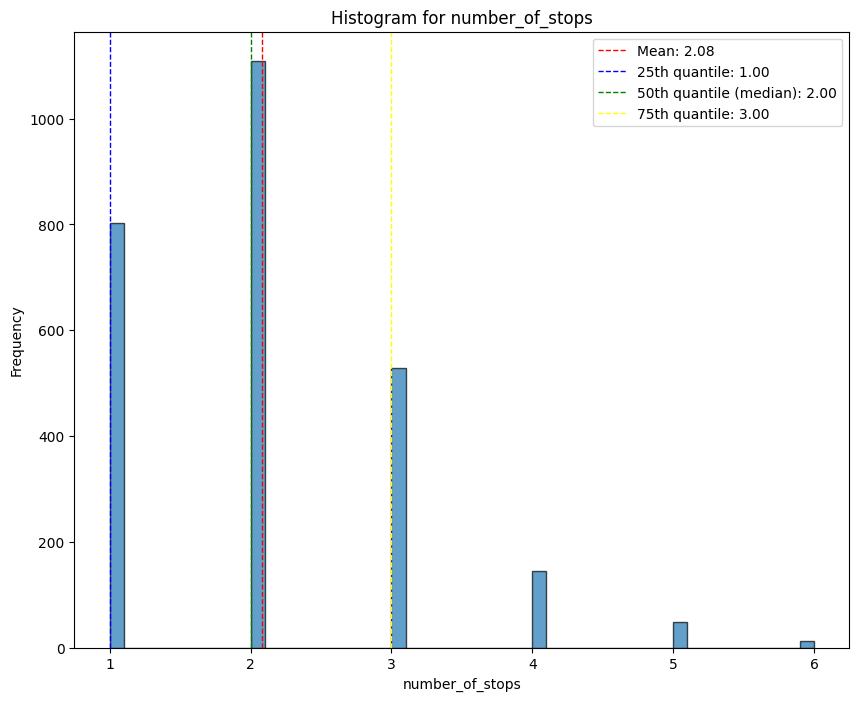

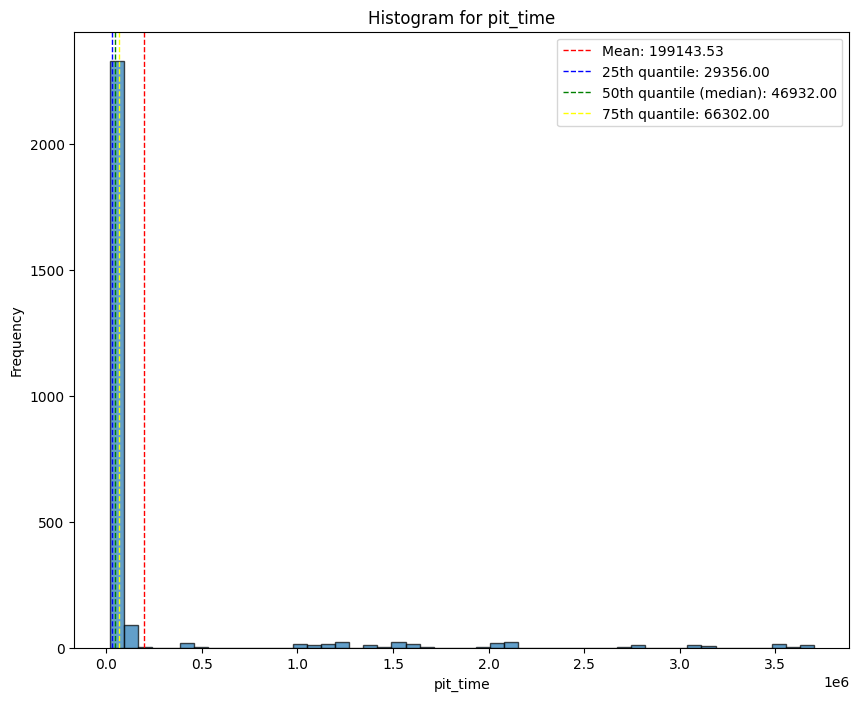

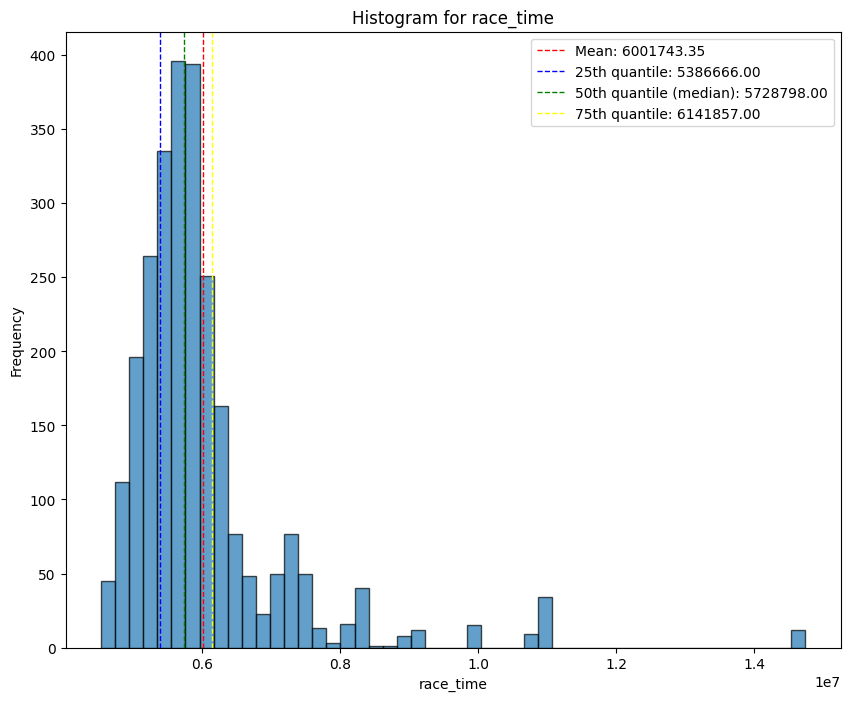

In [ ]:
def plot_histograms(dataframe, exclude_columns=[]):
    """
    Plots histograms for columns in the provided dataframe, excluding specified columns.
    Includes lines for mean and quantiles.

    Args:
    - dataframe (pd.DataFrame): The dataframe containing the data.
    - exclude_columns (list): List of columns to exclude from plotting.

    Returns:
    - None
    """
    # Filter out the numerical columns and exclude specified columns
    numerical_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

    # Plot histograms for each numerical column
    for column in numerical_columns:
        plt.figure(figsize = (10, 8))
        plt.hist(dataframe[column], bins = 50, edgecolor = 'black', alpha = 0.7)
        
        # Adding mean and quantiles
        mean_val = dataframe[column].mean()
        quantile_25 = dataframe[column].quantile(0.25)
        quantile_50 = dataframe[column].quantile(0.50)
        quantile_75 = dataframe[column].quantile(0.75)

        plt.axvline(mean_val, color='red', linestyle='dashed', 
        linewidth=1, label=f"Mean: {mean_val:.2f}")
        plt.axvline(quantile_25, color='blue', linestyle='dashed', 
        linewidth=1, label=f"25th quantile: {quantile_25:.2f}")
        plt.axvline(quantile_50, color='green', linestyle='dashed', 
        linewidth=1, label=f"50th quantile (median): {quantile_50:.2f}")
        plt.axvline(quantile_75, color='yellow', linestyle='dashed', 
        linewidth=1, label=f"75th quantile: {quantile_75:.2f}")

        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

# histograms for the dataset minus identifiers
plot_histograms(my_pit, exclude_columns=['raceId', 'driverId'])


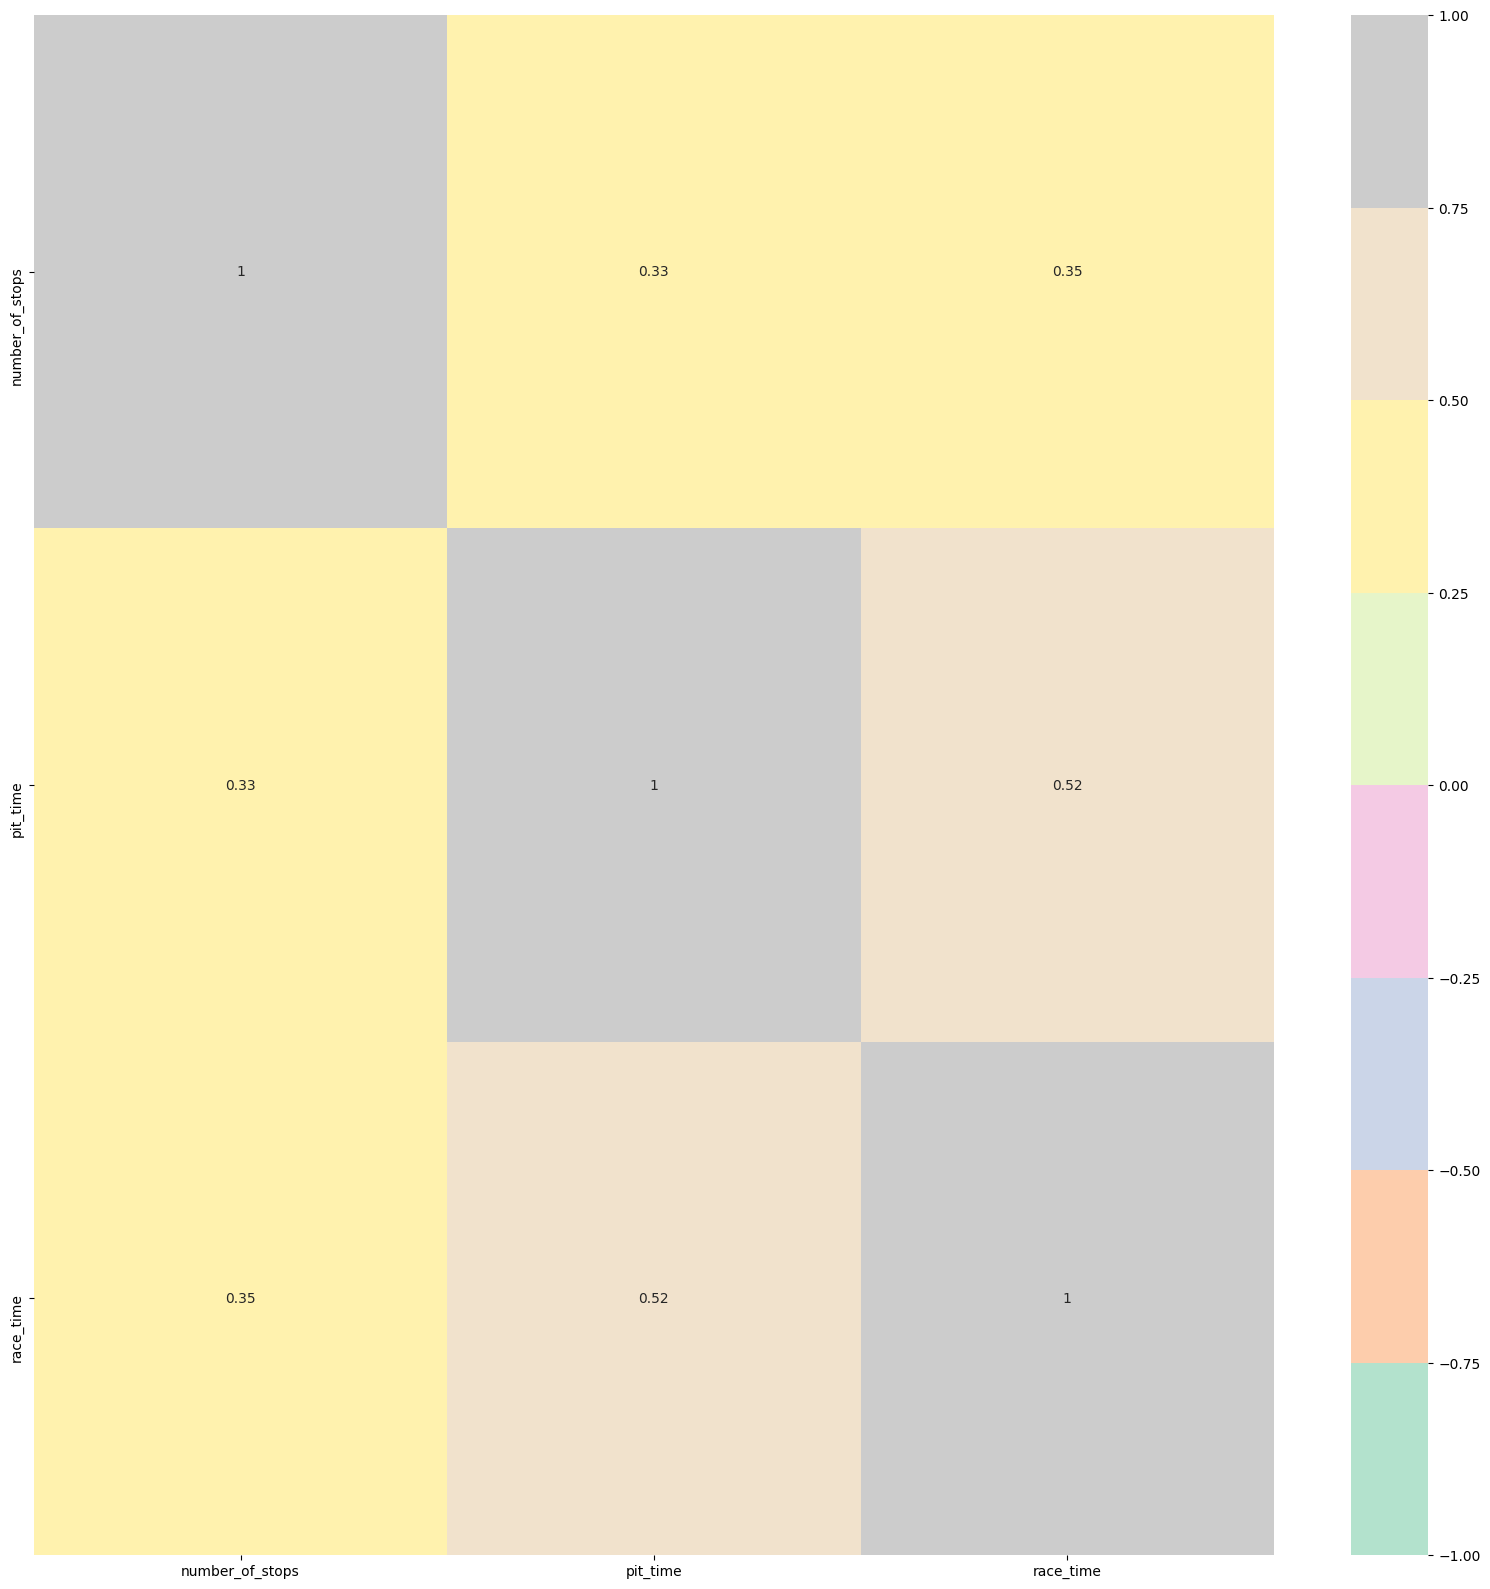

In [ ]:
import seaborn as sns

my_col = ['number_of_stops', 'pit_time', 'race_time']
correlation_matrix = my_pit[my_col].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot = True, cmap = 'Pastel2', vmin = -1, vmax = 1)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np


X = my_pit[['number_of_stops']]  # Predictor variable
y = my_pit['race_time']  # Outcome variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Now you can make predictions on the test data
y_pred = lr.predict(X_test)

# Create a summary DataFrame
summary_data = {
    'Coefficient': lr.coef_,
    'Intercept': lr.intercept_,
    'R-Squared': metrics.r2_score(y_test, y_pred),
    'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
    'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
    'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
}

summary_df = pd.DataFrame(summary_data)

# Transpose the DataFrame for a more familiar regression table layout
summary_df = summary_df.T

# Now print or save the summary_df DataFrame to a file
print(summary_df)

                                    0
Coefficient              4.047735e+05
Intercept                5.156286e+06
R-Squared                1.657806e-01
Mean Absolute Error      6.779243e+05
Mean Squared Error       1.211524e+12
Root Mean Squared Error  1.100692e+06


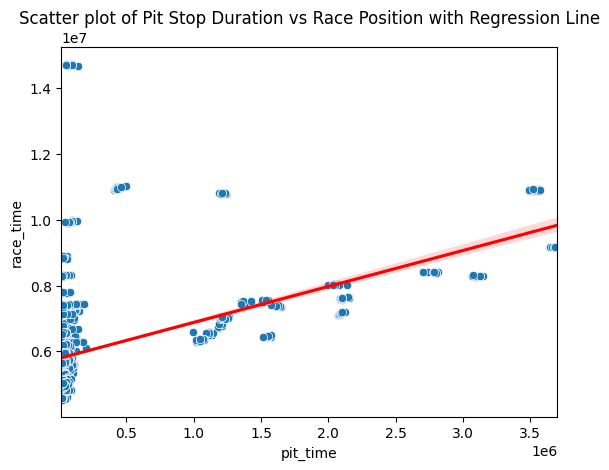

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# sho regression line
sns.scatterplot(x='pit_time', y='race_time', data=my_pit)
sns.regplot(x='pit_time', y='race_time', data=my_pit, scatter=False, color='red')
plt.title('Scatter plot of Pit Stop Duration vs Race Position with Regression Line')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R^2:', r2)

Mean Absolute Error: 566164.5299093657
R^2: 0.307663298492757


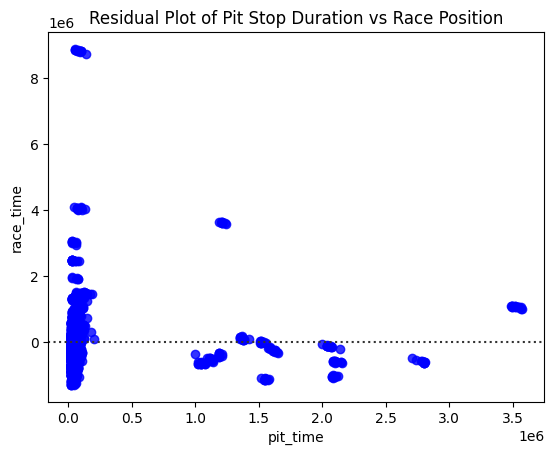

In [ ]:
sns.residplot(x='pit_time', y='race_time', data=my_pit, color='blue')
plt.title('Residual Plot of Pit Stop Duration vs Race Position')
plt.show()


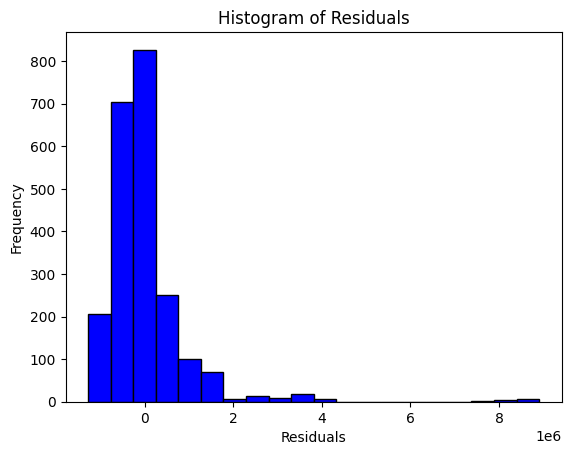

In [ ]:
import numpy as np


y_pred = lr.predict(X)
residuals = y - y_pred

plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the data into training and testing sets
X = my_pit[['number_of_stops', 'pit_time']] 
y = my_pit['race_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RMSE: 1088038.947851
Relative Error (range): 0.1065
Relative Error (mean): 0.1815


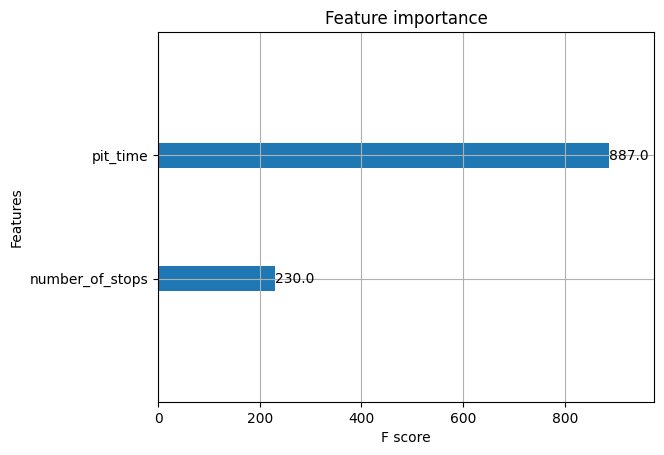

In [ ]:

# Initialize the model
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', 
                                 colsample_bytree = 0.3, 
                                 learning_rate = 0.5,
                                 max_depth = 5, 
                                 alpha = 10, 
                                 n_estimators = 100)

# Fit the model
xgb_regressor.fit(X_train, y_train)

# Predict
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False) # RMSE
print("RMSE: %f" % (rmse))

# Relative error with respect to the range
relative_error_range = rmse / (my_pit['race_time'].max() - my_pit['race_time'].min())

# Relative error with respect to the mean
relative_error_mean = rmse / my_pit['race_time'].mean()

print(f"Relative Error (range): {relative_error_range:.4f}")
print(f"Relative Error (mean): {relative_error_mean:.4f}")

# If you want to visualize feature importance
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_regressor)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R^2:', r2) 

Mean Absolute Error: 560640.8457207207
R^2: 0.11065700768847297


In [ ]:
#from sklearn.svm import SVR

#model = SVR(kernel = 'linear', C = 1e3, epsilon = 0.2)  # using linear kernel as an example
#model.fit(X_train, y_train)

# Predict on the test set
#y_pred = model.predict(X_test)

# Compute RMSE
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', rmse)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R^2:', r2) 

Mean Absolute Error: 814614.7655871239
R^2: 0.014898623969534674


## Bayesian Statistics